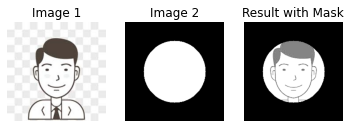

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
'''
遮罩的實現
利用cv2.add用法來實現mask，黑色的像素0則會遮蔽掉呈現黑色，白色像素255則會透明的方式顯現出原圖的樣子
'''
# 建立300*300的白色圖像
img1 = cv2.imread('./images.jpg')
img2 = np.zeros((224, 224), dtype=np.uint8)
# 在第二張圖像上繪製一個白色圓形
cv2.circle(img2, (112, 112), 70, 255, thickness=cv2.FILLED)

# 將利用遮罩的方式取出想要的畫面
# 將彩色圖片轉換為灰度圖
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 將灰度圖作為遮罩，進行相加
result = cv2.add(img1_gray, img1_gray, mask = img2)

# 將結果轉換回彩色圖
result_colored = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
# 顯示原始圖片和結果
plt.subplot(1, 3, 1), plt.imshow(img1), plt.title('Image 1'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(img2), plt.title('Image 2'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(result_colored), plt.title('Result with Mask'), plt.axis('off')
plt.show()



img1:(581, 900, 3)
max_area:3169.0
min_area:0.0


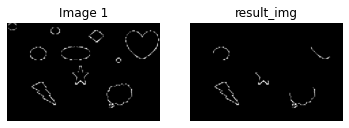

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

'''
濾除不想要的斑點(白點)
cv2.findContours 主要用於找尋物體的輪廓，通常在二值圖像（黑白圖像）中找尋物體的邊界。黑白圖像中的白色區域視為物體，黑色區域視為背景，findContours 會找尋物體和背景之間的邊界
'''
def filter_contours_by_area(img:np.ndarray,min_area_threshold):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 找到輪廓
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    #找出最大最小輪廓方便設定
    max_contour = max(contours, key=cv2.contourArea)
    max_area = cv2.contourArea(max_contour)
    min_contour = min(contours, key=cv2.contourArea)
    min_area = cv2.contourArea(min_contour)
    print(f'max_area:{max_area}')
    print(f'min_area:{min_area}')
    # 過濾輪廓，將面積小於 min_area_threshold 的輪廓區域設為背景值（0）
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < min_area_threshold:
            cv2.drawContours(img, [contour], -1, 0, thickness=cv2.FILLED) #將白點 轉換成黑色
    return img
#導入圖片
img1 = cv2.imread('./particle.jpg')
print(f'img1:{img1.shape}')
min_area_threshold = 1000 #設定想濾除的面積
#呼叫filter_contours_by_area函數
result_img = filter_contours_by_area(img1,min_area_threshold)

#因opencv導入圖片為BGR,PLT顯示圖片需要轉換成RGB
result_colored = cv2.cvtColor(result_img, cv2.COLOR_GRAY2BGR)
result_colored = cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)

# 顯示原始圖片和結果
plt.subplot(1, 2, 1), plt.imshow(img1), plt.title('Image 1'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(result_colored), plt.title('result_img'), plt.axis('off')
plt.show()


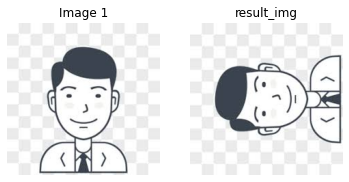

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle): 
    # 取得影像中心點坐標
    center = tuple(np.array(image.shape[1::-1]) / 2)
    # 設定旋轉矩陣
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    # 進行影像旋轉
    rotated_image = cv2.warpAffine(image, rotation_matrix, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return rotated_image

img1 = cv2.imread('./images.jpg')

result_img = rotate_image(img1,90)


#因opencv導入圖片為BGR,PLT顯示圖片需要轉換成RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
result_colored = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

# 顯示原始圖片和結果
plt.subplot(1, 2, 1), plt.imshow(img1), plt.title('Image 1'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(result_colored), plt.title('result_img'), plt.axis('off')
plt.show()

In [11]:
rotate_mapping = {'90': '270', '180': '180', '270': '90','0':'0'}
rotate_angle = rotate_mapping.get('90')
rotate_angle

'270'